In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Sources for getting datasets

1. Scikit-learn's buitltin dataset
    http://scikit-learn.org/stable/datasets/index.html
2. Kaggle Dataset
    https://www.kaggle.com
3. UCI (University of California) ML Repository
    https://archive.ics.uci.edu/ml/datasets.html

In [ ]:
iris = datasets.load_iris()

In [ ]:
# iris.DESCR
# iris.data
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Genrating your own dataset

The **sklearn.datasets.sample_generator** module from scikit-learn library contains a number of function to generate different types of dataset for different types of Problem.

## Linear Distributed Dataset

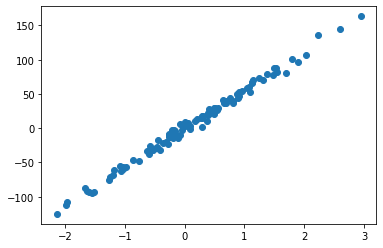

In [ ]:
from sklearn.datasets.samples_generator import make_regression

x, y = make_regression(n_samples = 100, n_features = 1, noise = 5.4)
plt.scatter(x, y)

## Clustered Dataset

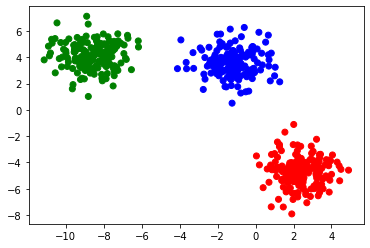

In [ ]:
from sklearn.datasets import make_blobs

x, y = make_blobs(500, centers=3)
rgb = np.array(['r', 'g', 'b'])
plt.scatter(x[:, 0], x[:, 1], color = rgb[y])

## Clustered Dataset Distribution in Circular Fashion

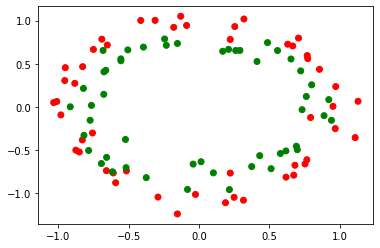

In [ ]:
from sklearn.datasets import make_circles

x, y = make_circles(100, noise=0.09)
rgb = np.array(['r', 'g', 'b'])
plt.scatter(x[:, 0], x[:, 1], color = rgb[y])

# Getting Started with Scikit-Learn

## Create Dataset

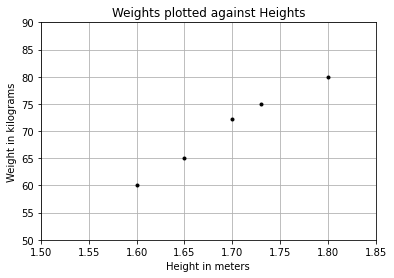

In [ ]:
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
weights = [[60], [65], [72.3], [75], [80]]

plt.title("Weights plotted against Heights")
plt.xlabel("Height in meters")
plt.ylabel("Weight in kilograms")

plt.plot(heights, weights, 'k.')

plt.axis([1.5, 1.85, 50, 90])
plt.grid(True)

## Fitting model using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X = heights, y = weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Making Predictions

In [ ]:
weight = model.predict([[1.75]])[0][0]
round(weight, 2)

76.04

## Plotting Linear Regression Line

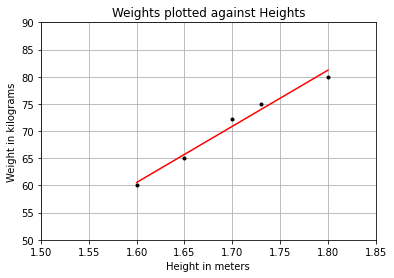

In [ ]:
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
weights = [[60], [65], [72.3], [75], [80]]

plt.title("Weights plotted against Heights")
plt.xlabel("Height in meters")
plt.ylabel("Weight in kilograms")

plt.plot(heights, weights, 'k.')

plt.axis([1.5, 1.85, 50, 90])
plt.grid(True)

plt.plot(heights, model.predict(heights), color = 'r')

## Getting gradient and intercept of Line

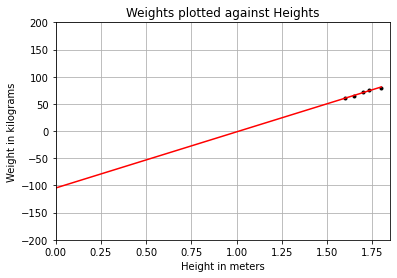

In [ ]:
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]
weights = [[60], [65], [72.3], [75], [80]]

plt.title("Weights plotted against Heights")
plt.xlabel("Height in meters")
plt.ylabel("Weight in kilograms")

plt.plot(heights, weights, 'k.')

plt.axis([0, 1.85, -200, 200])
plt.grid(True)

extreme_heights = [[0], [1.8]]
plt.plot(extreme_heights, model.predict(extreme_heights), color = 'r')

In [ ]:
round(model.predict([[0]])[0][0], 2)

-104.75

In [ ]:
round(model.intercept_[0], 2)

-104.75

In [ ]:
round(model.coef_[0][0], 2)

103.31

## Calculating Residual Sum of Squares

In [ ]:
round(np.sum((weights - model.predict(heights)) ** 2), 2)

5.34

## Testing the model using Test dataset

In [ ]:
heights_test = [[1.58], [1.62], [1.69], [1.76], [1.82]]
weights_test = [[58], [63], [72], [73], [85]]

# Total Sum of Squares (TSS)
weights_test_mean = np.mean(np.ravel(weights_test))
TSS = np.sum((np.ravel(weights_test) - weights_test_mean) ** 2)
print("TSS : %.2f" % TSS)

RSS = np.sum((np.ravel(weights_test) - np.ravel(model.predict(heights_test))) ** 2)
print("RSS : %.2f" % RSS)

R_squared = 1 - (RSS / TSS)
print("R-squared : %.2f" % R_squared)

# Using buitin R-squared
print("Builtin R-squared : %.4f" % model.score(heights_test, weights_test))

TSS : 430.80
RSS : 24.62
R-squared : 0.94
Builtin R-squared : 0.9429


## Save Model

There are two ways to save model
1. Using standard **pickle** module in **Python**
2. Using **joblib** module in **scikit-learn** 

In [ ]:
#import pickle

# Save model to disk
#filename = 'HeightAndWeightModel.sav'

# Write ro file using write and binary mode
#pickle.dump(model, open(filename, 'wb'))

# Load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

# result = loaded_model.score(heights_test, weights_test)

In [ ]:
# from sklearn.externals import joblib

# Save model to disk
#filename = 'HeightAndWeightModel.sav'

#joblib.dump(model, filename)

# Load the model from disk
# loaded_model = joblib.load(filename)

# result = loaded_model.score(heights_test, weights_test)

# Cleaning Data

In [39]:
# Check null values in dataframe
# df.isnull.sum()

# Replace all nans with avg of columns
# df = df.fillna(df.mean())

# Drop rows with na
# df = df.dropna()

# Reset index (serial. no#)
# df = df.reset_index(drop = True)

# Get all duplicate rows
# df = df[df.duplicated(keep = False)]

# Remove duplicate rows
#df.drop_duplicates(keep = "first", inplace = True)

# Drop duplicates for specific columns
#df.drop_duplicates(subset = [col_m, col_m, ... , col_z], keep = "last", inplace = True)

# Normalizing columns
# from sklearn import preprocessing

# x = df.values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_trasform(x)